# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

In [1]:
ls data

Advertising.csv* carseats.csv     khan_xtrain.csv  portfolio.csv
Credit.csv       college.csv      khan_ytest.csv   smarket.csv
auto.csv         default.csv      khan_ytrain.csv  usarrests.csv
boston.csv       hitters.csv      nci60_data.csv   wage.csv*
caravan.csv      khan_xtest.csv   nci60_labs.csv   weekly.csv


# Chapter 9: Support Vector Machines
"New" learning method invented by Vladamir Vapnik in the 1990's. Likely best classifier at its time, now surpassed by gradient boosted trees and neural networks.

Three different but very closely related classifiers in this chapter
* Maximum margin classifier
* Support Vector classifier
* Support vector machine

## Maximum Margin Classifier
An optimal hyperplane that separates classes.  
**Hyperplane** - For any p dimensional space, it is a p-1 dimensional flat surface. A line in 2 dimensions, a plane in three dimensions. Mathematical definition in p dimensions: $\beta_0 + \beta_1 X_1 + ... + \beta_p X_p = 0$. It divides whatever your dimension is into two pieces.

## Linearly Separable Case
First and easiest we will look at a 2 dimensional data that is perfectly linearly separable. Here the hyperplane is a line. ![line](https://www.otexts.org/sites/default/files/resize/sfml/images/sep_hyp-600x486.png)

Many different lines can be drawn here to separate the data. For math simplification, lets let $y$ equal -1 for one class and the other 1, then if $\beta_0 + \beta_1 X_1 + ... + \beta_p X_p > 0$ we will classify the observation as 1 and if $\beta_0 + \beta_1 X_1 + ... + \beta_p X_p < 0$ we will classify it as -1. 

Multiplying both equations by $y$ yields $y(\beta_0 + \beta_1 X_1 + ... + \beta_p X_p) > 0$ for any correctly classified observation.

If the data is perfectly separable then an infinite number of hyperplanes will exist that can perfectly separate the data. A natural choice is to choose a hyperplane the maximizes the distance from each observation to the hyperplane - one that has a large margin - the maximum margin.

## What defines maximum margin?
In the linearly separable case we find the line that has the maximum margin between the two classes. The maximum margin is defined as the distance of the closet point to the separating hyperplane. So, we are maximizing the minimum distance from the hyperplane. All other points are of no consequence which is a bit scary but it happens to work well. These minimum distance points are called the support vectors.

## Non-Separable Data
If the data is not linearly separable then no hyperplane can separate the data and thus no margin can exist. This case is most common with real data. The maximum margin classifier is very sensitive to single data points. The hyperplane can change drastically with the addition of one new data point. To help combat this type of overfitting and to allow for non-separable classification we can use a soft margin. We allow some observation to be on the wrong side of the hyperplane or within the margin. This margin violation makes the margin 'soft'.

The problem formulation is tweaked such that we allow for some total amount of error, C. This total error acts as an allowance like a balance in the bank that you can spend on the amount of error you can make. The errors are called slack variables. C is chosen through cross-validation.

## Support Vector Machines
For data that has a non-linear separating hyperplane, something different must be done. We can transform the variables as in previous chapters - squaring them, creating interaction terms, etc... or we can use kernels. The support vector machine can enlarge the feature space without doing these transformations in an efficient manner using kernels.

The solution to SVM's involves only inner products of the observations. The decision boundary is just a weighted sum of the inner product between observations that are the support vectors. The inner product can be replaced with a kernel function. There are several different kernel functions. Linear kernel is just the standard inner product. Polynomial kernel is linear kernel taken to the power of a chosen polynomial. The radial basis function is proportional to the squared distance between points. All kernels measure a degree of closeness. So the further the two points in the kernel function are, the smaller the result of the kernel calculation.

Kernels allow for very high dimensional (infinite with radial basis function) feature space enlargement without actually going into that space.

## Multi-Class SVM
Two different approaches for K classes where K > 2. One vs One constructs a different SVM for every pair of classes that exist. Test observations are assigned to the class that gets the most votes. One vs All constructs K SVMs where all observations are used - each class is compared to all other K-1 classes. The class with the greatest distance from the hyperplane is chosen.

# for class
Define hyperplane. Write equation = 0. Sides of hyperplanes determine classification. Not a probabilistic model but can use distance from hyperplane to be a proxy for certainty. Show that coefficients point orthogonal to hyperplane

Dario - Maximum margin classifiers

do simple linearly separable case (hard margin) with y = 1/2x + 1 with points (1,4) and (3, 0) as the support vectors

Write data points (x1, x2), y where y is -1 or 1

Make data points in a manner that one additional point of one class close to another class has tremendous influence on the line.

Set up problem specification: Maximize margin subject to norm of weights = 1 and y(xb) >= M.

When norm of weights =1 then y(xb) gives the distance from the point to the hyperplane. and xb = M give the equation to the support vector

Support vector classifiers
Non-separable case. allow for error. extremely sensitive to one data point. Soft margin classifier. Want robustness, generalization. 

Make specification: Maximize M, subject to norm of weights = 1 and y(xb) > M(1 - e) where sum(e) < C, errors are called slack variables. Hyperplane is still boundary for classification. 

Slack variables: if e = 0, on correct side of margin. if e between 0 and 1 then between margin and hyperplane. If e > 1 then misclassified.

C: Budget, "the bank". If C = 0 then need linear separability. Chosen via cv. 

Only observations that lie on the margin or violate are the support vectors and the only observation that affect the model

Gerardo - Support vector machines
Needed for non-linear decision boundaries. Can enlarge feature space by using polynomial, interaction terms and a linear classifier can again be used. Kernel approach is very efficient computationally. The linear support vector classifier is just sum of inner product of X and each observation times a constant, but only non-zero constants are the support vectors.

Instead of just the inner product, a kernel function can be used. The linear kernel is just the inner product. Kernels measure similarity.

# Exercises

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1

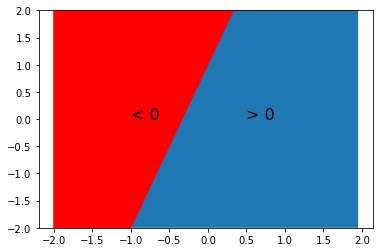

In [3]:
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 + 3*x
plt.fill_between(section, f(section), y2=-2)
plt.fill_between(section, f(section), y2=2, color='r')
plt.text(.5, 0, "> 0", fontsize=16)
plt.text(-1, 0, "< 0", fontsize=16)
plt.ylim(-2, 2);

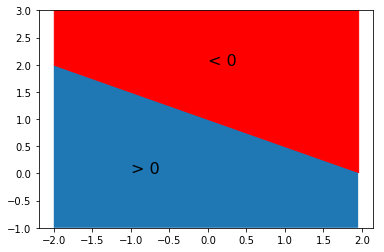

In [4]:
section = np.arange(-2, 2, 1/20.)
f = lambda x: 1 - .5*x
plt.fill_between(section, f(section), y2=-1)
plt.fill_between(section, f(section), y2=3, color='r')
plt.text(0, 2, "< 0", fontsize=16)
plt.text(-1, 0, "> 0", fontsize=16)
plt.ylim(-1, 3);

# 2

(-1, 5)

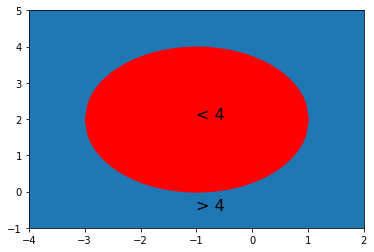

In [5]:
section = np.arange(-3, 1.05, 1/20.)
f = lambda x: 2 + np.sqrt(4 - (1 + x)**2)
g = lambda x: 2 - np.sqrt(4 - (1 + x)**2)
plt.fill_between(np.arange(-5, 5), -10, 10)
plt.fill_between(section, g(section), f(section), color='r')
plt.text(-1, 2, "< 4", fontsize=16)
plt.text(-1, -.5, "> 4", fontsize=16)
plt.xlim(-4, 2)
plt.ylim(-1, 5)

c) 
* (0, 0) = blue
* (-1, 1) = red  
* (2, 2) = blue
* (3, 8) = blue

d) x1, x2, x1^2 and x^2 are linear in 4 dimensions. When it is projected down to 2 dimensions we get a circle.

# 3

In [6]:
df = pd.DataFrame(np.array([[3, 4, -1], [2, 2, -1], [4, 4, -1], [1, 4, -1], [2, 1, 1], [4, 3, 1], [4, 1, 1]]), 
             columns=['x1', 'x2', 'y'])
df['color'] = df['y'].map({1: 'r', -1:'b'})
df

,x1,x2,y,color
0,3,4,-1,b
1,2,2,-1,b
2,4,4,-1,b
3,1,4,-1,b
4,2,1,1,r
5,4,3,1,r
6,4,1,1,r


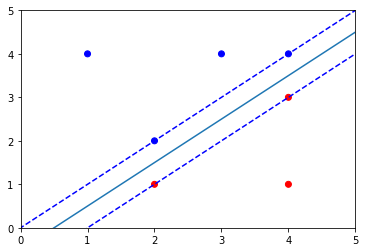

In [7]:
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
plt.plot(section, f(section))
plt.plot(section, f(section) + .5, 'b--')
plt.plot(section, f(section) - .5, 'b--')
plt.ylim(0, 5)
plt.xlim(0, 5);

d) Classification rule if x1 - x2 - .5 > 0 then red else blue

In [8]:
# e) margin is distance from support vector to line.
print("margin is", .5 / np.sqrt(2))

margin is 0.353553390593


f) point (4, 1) is far from the hyperplane and changing it slightly will have no effect on it.

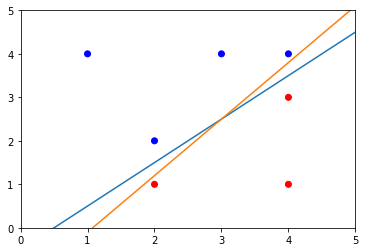

In [9]:
#g Green line is non-optimal hyperplane. Still separates data but worse margin
plt.scatter(df['x1'], df['x2'], color=df['color']);
# maximum separating hyperplane is x1 - x2 - .5 = 0
section = np.arange(-3, 8)
f = lambda x: x - .5
g = lambda x: 1.3 * x - 1.4
plt.plot(section, f(section))
plt.plot(section, g(section))
plt.ylim(0, 5)
plt.xlim(0, 5);

# 4

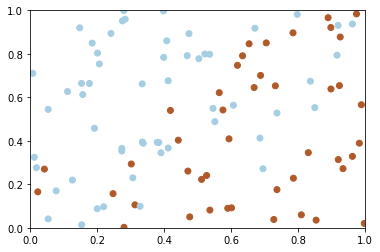

In [10]:
# create fake data where true boundary is x2 - x1 = 0
X = np.random.rand(100, 2)
d = 3 * (X[:, 0] - X[:, 1])
n = np.random.randn(100)
y = np.where(n > d, 0, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1);

In [11]:
from sklearn.svm import SVC

In [12]:
clf = SVC(kernel='linear', C=10)

In [13]:
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
clf.intercept_, clf.coef_

(array([-1.53539481]), array([[ 4.60953265, -2.0537453 ]]))

(0, 1)

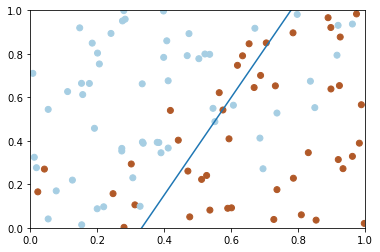

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
section = np.arange(0, 1, .01)

beta0 = clf.intercept_
beta1 = clf.coef_[0, 0]
beta2 = clf.coef_[0, 1]

f = lambda x: (beta0 + beta1 * x) / -beta2
plt.plot(section, f(section))
plt.xlim(0, 1)
plt.ylim(0, 1)

Use sklearn code found [here](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html) to plot decision boundaries for svm

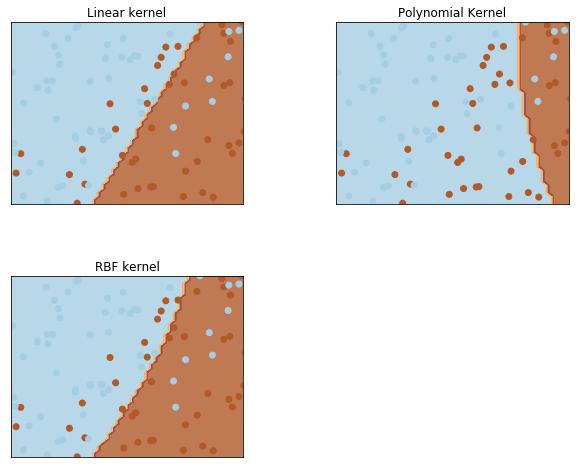

In [16]:
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(0, 1, h),
                     np.arange(0, 1, h))

# title for the plots
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

In [17]:
#poly actually does worse. Might need some tuning
svc.score(X, y), rbf_svc.score(X, y), poly_svc.score(X, y)

(0.77000000000000002, 0.76000000000000001, 0.64000000000000001)

# 5

In [18]:
X = np.random.rand(500,2) - .5
y = (X[:, 0] ** 2 - X[:, 1] ** 2 > 0) * 1

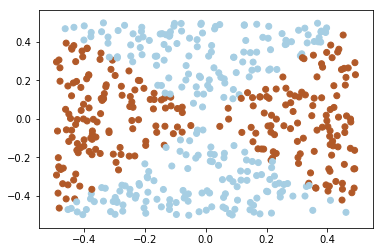

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired);

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_clf = LogisticRegression()

In [22]:
log_clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

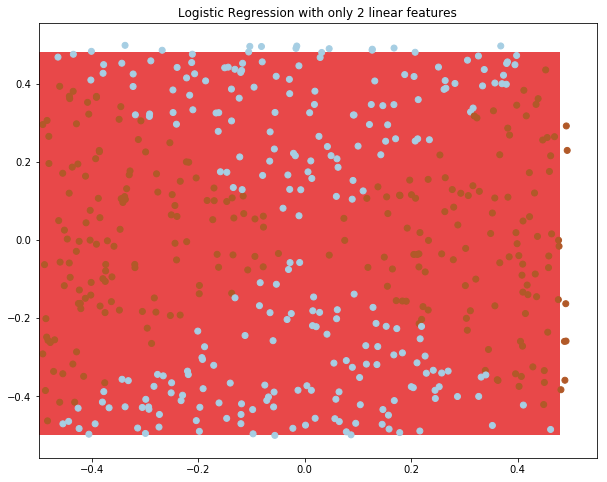

In [23]:
h = .02 

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 2 linear features");

In [24]:
X_new = np.column_stack((X, X ** 2, X[:, 0] * X[:, 1]))

In [25]:
X_new.shape

(500, 5)

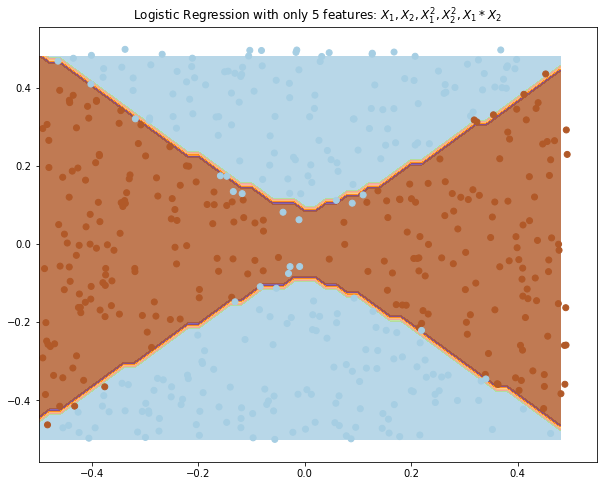

In [26]:
log_clf.fit(X_new, y)

h = .02 

xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))


plt.figure(figsize=(10,8))
Z = log_clf.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel()**2, yy.ravel()**2, xx.ravel() * yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Logistic Regression with only 5 features: $X_1, X_2, X_1^2, X_2^2, X_1*X_2$");

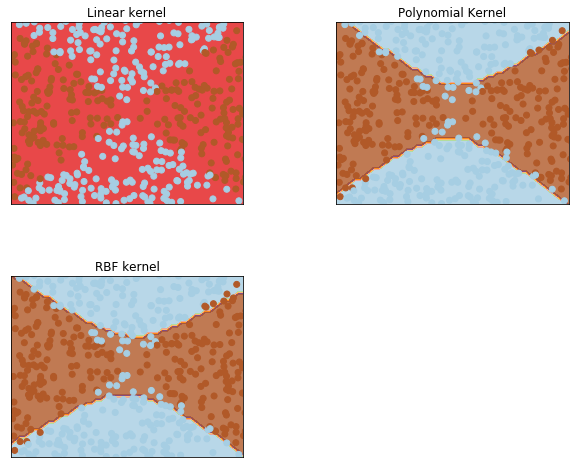

In [27]:
h = .02  # step size in the mesh

C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C).fit(X, y)
poly_svc = SVC(kernel='poly', degree=2, C=1).fit(X, y)
rbf_svc = SVC(kernel='rbf', gamma=.5, C=1).fit(X, y)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(-.5, .5, h),
                     np.arange(-.5, .5, h))

# title for the plots
titles = ['Linear kernel',
          'Polynomial Kernel',
          'RBF kernel']

plt.figure(figsize=(10,8))
for i, clf in enumerate((svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

Linear Kernel fails here, must use polynomial or rbf

# 6

In [28]:
# Make a linear decision boundary at x2 > .5
X = np.random.rand(500, 2)
y = (X[:, 1] > .5) * 1

X_train = X[:250]
X_test = X[250:]
y_train = y[:250]
y_test = y[250:]

(0, 1)

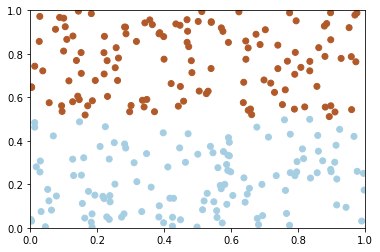

In [29]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlim(0, 1)
plt.ylim(0, 1)

In [30]:
all_C = np.logspace(-2,-1, 100)
train_scores = []
test_scores = []
for c in all_C:
    svc = SVC(kernel='linear', C=c)
    svc.fit(X_train, y_train)
    train_scores.append(svc.score(X_train, y_train))
    test_scores.append(svc.score(X_test, y_test))

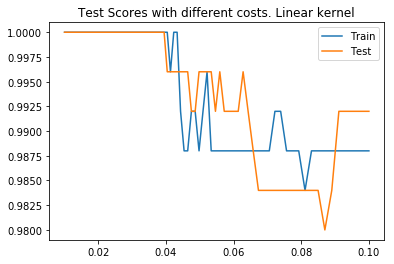

In [31]:
plt.plot(all_C, train_scores, label="Train")
plt.plot(all_C, test_scores, label="Test")
plt.title("Test Scores with different costs. Linear kernel")
plt.legend();

I don't think they worded this problem well. There needs to be a linearl separable data that has a wide enough decision boundary where points can be misclassified given new data.

# 7

In [32]:
auto = pd.read_csv("data/auto.csv")

In [33]:
auto['y'] = (auto['mpg'] > auto['mpg'].median()) * 1

In [34]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,y
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [35]:
X = pd.concat((pd.get_dummies(auto[['cylinders', 'origin', 'year']].astype(object)), 
               auto[['displacement', 'horsepower', 'weight', 'acceleration']],), axis=1)
y = auto['y']

In [36]:
X.head()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3,year_70,year_71,...,year_77,year_78,year_79,year_80,year_81,year_82,displacement,horsepower,weight,acceleration
0,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,307.0,130,3504,12.0
1,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,350.0,165,3693,11.5
2,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,318.0,150,3436,11.0
3,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,304.0,150,3433,12.0
4,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,302.0,140,3449,10.5


In [41]:
from sklearn.model_selection import cross_val_score

In [38]:
X_new = auto.iloc[:, 1:7]

In [39]:
for c in np.logspace(-4,1, 10):
    clf = SVC(kernel='linear', C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("Linear SVM with c={} has test accuracy of {}".format(round(c,4), round(scores.mean(), 3)))

Linear SVM with c=0.0001 has test accuracy of 0.898
Linear SVM with c=0.0004 has test accuracy of 0.905
Linear SVM with c=0.0013 has test accuracy of 0.9
Linear SVM with c=0.0046 has test accuracy of 0.88
Linear SVM with c=0.0167 has test accuracy of 0.878
Linear SVM with c=0.0599 has test accuracy of 0.873
Linear SVM with c=0.2154 has test accuracy of 0.871
Linear SVM with c=0.7743 has test accuracy of 0.86
Linear SVM with c=2.7826 has test accuracy of 0.87
Linear SVM with c=10.0 has test accuracy of 0.87


In [40]:
for c in np.logspace(-2,3, 10):
    gamma = .00001
    clf = SVC(kernel='rbf', gamma=gamma, C=c)
    scores = cross_val_score(clf, X_new, y, n_jobs=-1, cv=5)
    print("RBF SVM with c={} and gamma = {} has test accuracy of {}".format(round(c,4), gamma, round(scores.mean(), 3)))

RBF SVM with c=0.01 and gamma = 1e-05 has test accuracy of 0.885
RBF SVM with c=0.0359 and gamma = 1e-05 has test accuracy of 0.88
RBF SVM with c=0.1292 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=0.4642 and gamma = 1e-05 has test accuracy of 0.88
RBF SVM with c=1.6681 and gamma = 1e-05 has test accuracy of 0.885
RBF SVM with c=5.9948 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=21.5443 and gamma = 1e-05 has test accuracy of 0.883
RBF SVM with c=77.4264 and gamma = 1e-05 has test accuracy of 0.895
RBF SVM with c=278.2559 and gamma = 1e-05 has test accuracy of 0.895
RBF SVM with c=1000.0 and gamma = 1e-05 has test accuracy of 0.891


Polynomial kernel not able to be solved in reasonable time